In [1]:
from datas import *
from preprocessing import *
from vocabulaire import *

# Données classification de sentiments (films)

In [2]:
alltxts, alllabs = load_movies()

print(len(alltxts),len(alllabs))
print("----------------------")
print(alltxts[0][:250], '...')
print("----------------------")
print(alllabs[0])

2000 2000
----------------------
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " fi ...
----------------------
0


In [5]:
df=pd.DataFrame({"text":alltxts, "polarite":alllabs})
df.head()

,text,polarite
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard's quick movie review \ndamn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' firs...",0
4,synopsis : a mentally unstable man undergoing ...,0


In [4]:
labels = df['polarite'].unique()
print(f"labels des polarités: Négative :{labels[0]} , Positive : {labels[1]}")
print(df.iloc[:,-1].value_counts())


labels des polarités: Négative :0 , Positive : 1
polarite
0    1000
1    1000
Name: count, dtype: int64


# A) Transformation paramétrique du texte (pre-traitements)

Vous devez tester, par exemple, les cas suivants:
- transformation en minuscule ou pas
- suppression de la ponctuation
- transformation des mots entièrement en majuscule en marqueurs spécifiques
- suppression des chiffres ou pas
- conservation d'une partie du texte seulement (seulement la première ligne = titre, seulement la dernière ligne = résumé, ...)
- stemming
- ...


Vérifier systématiquement sur un exemple ou deux le bon fonctionnement des méthodes sur deux documents (au moins un de chaque classe).

Pretraitement Dataset Train

In [5]:
## Pretraitement en gardant les stopwords. Effectué en amont.
#df_preprocessed_with_sw = preprocess_movies(df, stemming=True,stop_words=False)
#df_sans_sw.to_csv("./dataframes/df_movies_stem_swF.csv", index=False)
#df_preprocessed_with_sw

In [6]:
## Prétraitement en supprimant les stopwords. Effectué en amont.
#df_preprocessed_no_sw = preprocess_movies(df.head(), stemming=True, stop_words=True)
#df_preprocessed_sw.to_csv("./dataframes/df_movies_stem_sw.csv", index=False)
#df_preprocessed_no_sw

Pretraitement Dataset Test

In [7]:
#alltxts_test = load_test_movies("./datasets/testSentiment.txt")
#df_test = pd.DataFrame(alltxts_test, columns=['text'])
#df_test.head()

,text
0,Story of a man who has unnatural feelings for ...
1,Bromwell High is a cartoon comedy. It ran at t...
2,Airport '77 starts as a brand new luxury 747 p...
3,This film lacked something I couldn't put my f...
4,"Sorry everyone,,, I know this is supposed to b..."


In [19]:
## Pretraitement du dataset de test sans suppression des stopwords. 
## Effectué en amont.
#df_test_preprocessed = preprocess_movies(df_test, stemming=True, stop_words=False)
#df_test_preprocessed.to_csv("./dataframes/df_movies_test_stem_swF.csv", index=False)
#df_test_preprocessed.head()

,text
0,stori man who ha unnatur feel for pig start ou...
1,bromwel high cartoon comedi ran the same time ...
2,airport start brand new luxuri plane load wi...
3,thi film lack someth could nt put finger first...
4,sorri everyon know thi suppos art film but wow...


# B) Extraction du vocabulaire (BoW)

- **Exploration préliminaire des jeux de données**
    - Quelle est la taille d'origine du vocabulaire?
    - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
    - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
    - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
    - Quelle est la distribution d'apparition des mots (Zipf)
    - Quels sont les 100 bigrammes/trigrammes les plus fréquents?

- **Variantes de BoW**
    - TF-IDF
    - Réduire la taille du vocabulaire (min_df, max_df, max_features)
    - BoW binaire
    - Bi-grams, tri-grams
    - **Quelles performances attendre ? Quels sont les avantages et les inconvénients des ces variantes?**

## Exploration préliminaire des jeux de données

### Quelle est la taille d'origine du vocabulaire?

In [3]:
## Récupérer le dataframe du dataset prétraité
df_preprocessed = pd.read_csv('./dataframes/df_movies_stem_swF.csv')

In [9]:
dic_size_original, mots_orignal, _ = get_vocabulaire(df)
dic_size_preprocessed, mots_preprocessed, _ = get_vocabulaire(df_preprocessed)

print('La taille du vocabulaire avant preprocessing est : ', dic_size_original)
print('Le vocabulaire avant preprocessing est : ', mots_orignal)
print()
print('La taille du vocabulaire après preprocessing est : ', dic_size_preprocessed)
print('Le vocabulaire après preprocessing est : ', mots_preprocessed)
print()
reduction = (1-(dic_size_preprocessed/dic_size_original))*100
print(f'Le vocabulaire a été réduit de {round(reduction, 2)} %')

La taille du vocabulaire avant preprocessing est :  39653
Le vocabulaire avant preprocessing est :  ['00' '000' '0009f' ... 'zwigoff' 'zycie' 'zzzzzzz']

La taille du vocabulaire après preprocessing est :  30627
Le vocabulaire après preprocessing est :  ['aaa' 'aaaaaaaaah' 'aaaaaaaahhhh' ... 'zwick' 'zwigoff' 'zyci']

Le vocabulaire a été réduit de 22.76 %


In [11]:
dic_size_preprocessed, mots_preprocessed, _ = get_vocabulaire(df_preprocessed, min__df=10, max__df=0.9)

print('La taille du vocabulaire après preprocessing et application \nde min/max df est : ', dic_size_preprocessed)
print('Le vocabulaire après preprocessing et min/max df est : ', mots_preprocessed)
print()
reduction = (1-(dic_size_preprocessed/dic_size_original))*100
print(f'Le vocabulaire a été réduit de {round(reduction, 2)} %')

La taille du vocabulaire après preprocessing et application 
de min/max df est :  6208
Le vocabulaire après preprocessing et min/max df est :  ['aaron' 'abandon' 'abduct' ... 'zombi' 'zone' 'zoom']

Le vocabulaire a été réduit de 84.34 %


### Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]

In [12]:
dic_size_preprocessed_1, mots_1, dictionnaire_mots_freq_1 = get_vocabulaire(df_preprocessed, top=100)
print('Les 100 mots les plus fréquents dans le dataset sont :\n', mots_1)

Les 100 mots les plus fréquents dans le dataset sont :
 ['about' 'after' 'all' 'also' 'ani' 'are' 'bad' 'be' 'becaus' 'been'
 'best' 'but' 'can' 'charact' 'come' 'could' 'did' 'doe' 'end' 'even'
 'film' 'first' 'for' 'from' 'get' 'good' 'ha' 'had' 'have' 'her' 'hi'
 'him' 'how' 'into' 'it' 'just' 'know' 'life' 'like' 'littl' 'look' 'love'
 'make' 'man' 'more' 'most' 'movi' 'much' 'never' 'not' 'nt' 'off' 'one'
 'onli' 'other' 'out' 'over' 'peopl' 'perform' 'play' 'plot' 'realli'
 'scene' 'see' 'seem' 'she' 'show' 'some' 'stori' 'take' 'than' 'that'
 'their' 'them' 'then' 'there' 'these' 'they' 'thi' 'thing' 'time' 'too'
 'tri' 'two' 'veri' 'wa' 'way' 'well' 'what' 'when' 'where' 'which'
 'while' 'who' 'will' 'with' 'work' 'would' 'year' 'you']


#### Visualisation en wordcloud

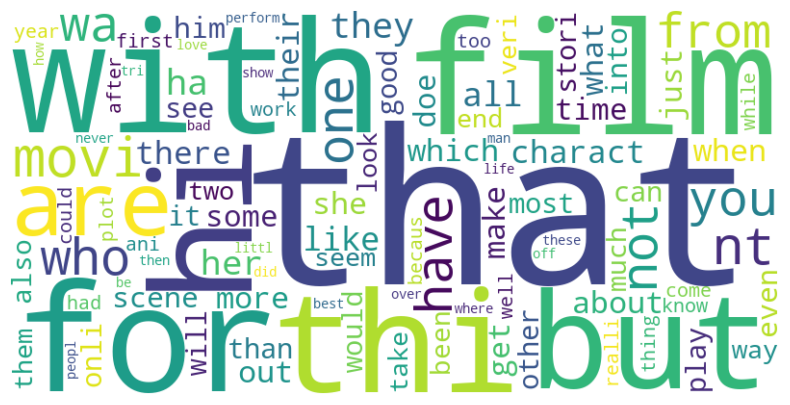

In [13]:
visualiser_wordcloud(dictionnaire_mots_freq_1)

#### 100 mots les plus frequents des reviews positives

Le vocabulaire des reviews positives est :
 ['about' 'after' 'all' 'also' 'ani' 'are' 'be' 'becaus' 'been' 'best']...


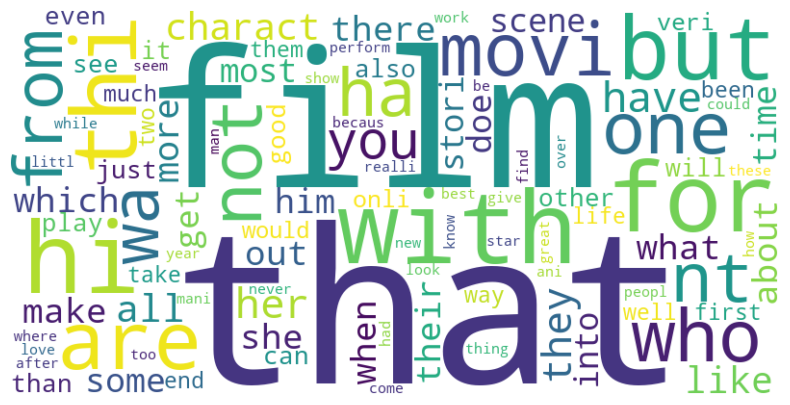

In [6]:
## Récupérer le vocabulaire des reviews positives 
df_positif = (df_preprocessed.loc[df['polarite'] == 1])
dic_size_positif, mots_positif, dictionnaire_mots_freq_positif = get_vocabulaire(df_positif, top=100)

print(f'Le vocabulaire des reviews positives est :\n {mots_positif[:10]}...')
visualiser_wordcloud(dictionnaire_mots_freq_positif)

#### 100 mots plus frequents des reviews negatives

Le vocabulaire des reviews négatives est :
['about' 'action' 'actor' 'after' 'all' 'also' 'ani' 'are' 'bad' 'be']...


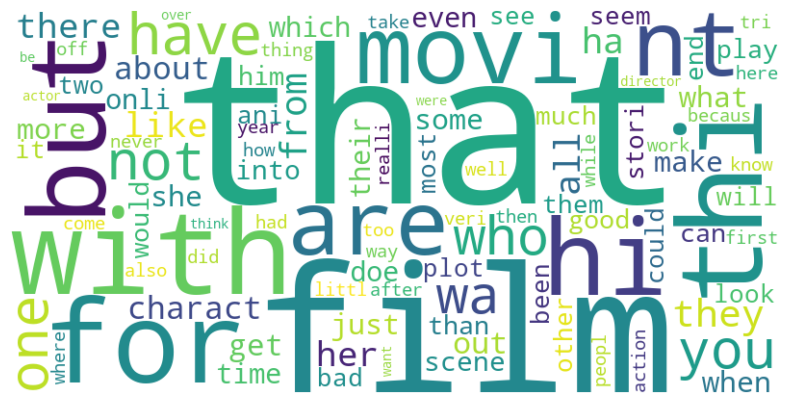

In [7]:
## Récupérer les phrases des reviews negatives
df_negatif = (df_preprocessed.loc[df['polarite'] == 0])
dic_size_negatif, mots_negatif, dictionnaire_mots_freq_negatif = get_vocabulaire(df_negatif, top=100)

print(f'Le vocabulaire des reviews négatives est :\n{mots_negatif[:10]}...')
visualiser_wordcloud(dictionnaire_mots_freq_negatif)

#### Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]

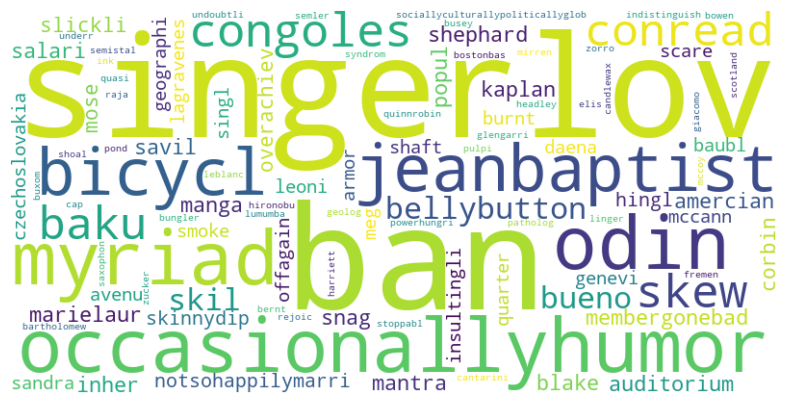

In [14]:
vectorizer = CountVectorizer(binary=True)
bow_binaire = vectorizer.fit_transform(df.text)  
bow_binaire = bow_binaire.toarray()

frequence_documentaire_mots = np.sum(bow_binaire, axis=0)

dict_mot_freq_docu = dict(zip(mots_preprocessed,frequence_documentaire_mots)) # Creer un dictionnaire qui associe à chaque mot, le nombre de documents dans lesquels il apparait

#Trier le dictionnaire selon les fréquences des mots
dict_mot_freq_docu_trie = dict(sorted(dict_mot_freq_docu.items(), key=lambda item: item[1], reverse=True))


#Récupérer les n mots les plus fréquents
n_mots_freq_docu = dict(list(dict_mot_freq_docu_trie.items())[:100])

visualiser_wordcloud(n_mots_freq_docu)

#### Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]

Mots plus discriminants reviews positives
['aboslut', 'admiss', 'affect', 'allpurpl', 'aprhodit', 'commodu', 'contentedli', 'dark', 'bemoan', 'alwayswoozi', 'broken', 'bullhead', 'cathrin', 'cr', 'bumstead', 'christian', 'avalon', 'closecrop', 'cabaret', 'condol', 'corrobor', 'cancerogen', 'consumptioncrazi', 'blondi', 'congratul', 'crazybeauti', 'bowielik', 'carousel', 'arroway', 'dann', 'aerial', 'bombard', 'between', 'antidot', 'aardman', 'amok', 'bareknuckl', 'conceal', 'crash', 'boston', 'bind', 'blooper', 'cicero', 'capergoneawri', 'charactercontrol', 'cheesiest', 'criticmod', 'cellphon', 'astair', 'chidduck', 'bigscreen', 'biel', 'burgess', 'baywatch', 'boxset', 'china', 'clude', 'chucki', 'balloon', 'clutterbuck', 'cmon', 'brooder', 'chines', 'cuddi', 'beah', 'crud', 'counterpart', 'aimless', 'absolout', 'actorwis', 'contemptu', 'amphibi', 'batgirl', 'copsonthetrailofserialkil', 'backyard', 'btw', 'caron', 'acoffe', 'antigun', 'applesauc', 'cooper', 'agetyp', 'airwav', 'bacri',

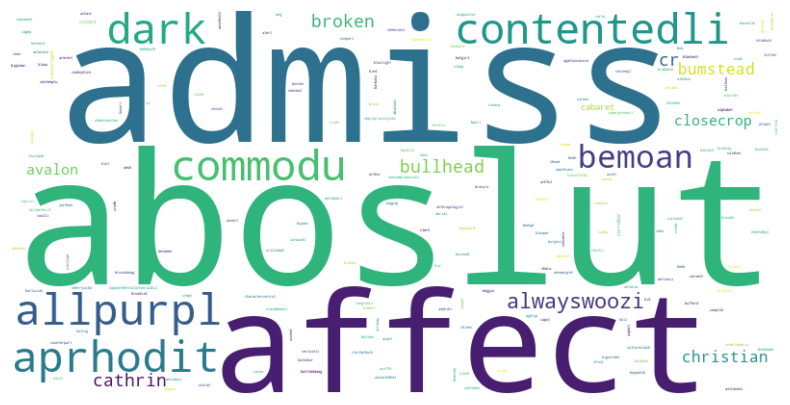


Mots plus discriminants reviews négatives
['cadr', 'caller', 'colosseum', 'arden', 'batallion', 'blemish', 'abbi', 'costar', 'cmaeron', 'bratti', 'blister', 'clownforhir', 'centrifug', 'accur', 'chapel', 'columbu', 'apac', 'boarder', 'cottrel', 'briefclad', 'corps', 'dawson', 'burstyn', 'admitedli', 'bertolini', 'buddybuddi', 'daemon', 'bourgeoi', 'brosh', 'brazillian', 'bonehead', 'chain', 'actionanim', 'cruelli', 'bloopersflub', 'crowddraw', 'concis', 'bamboo', 'beatric', 'baptist', 'danza', 'boozedout', 'animatron', 'clarif', 'badass', 'certif', 'chevi', 'brand', 'darth', 'constitution', 'conscious', 'charliz', 'aesthet', 'afloat', 'aren', 'belief', 'boxer', 'britney', 'compendium', 'canadian', 'cringing', 'bloodi', 'allegi', 'brisk', 'ahem', 'collabor', 'confus', 'alterior', 'blownout', 'bombay', 'cradl', 'cast', 'buddytyp', 'danni', 'amberlik', 'briskli', 'copymachin', 'bodi', 'actorwait', 'bodhi', 'bodili', 'cometdisast', 'conspiracymartialart', 'contamin', 'crucifixt', 'boy', '

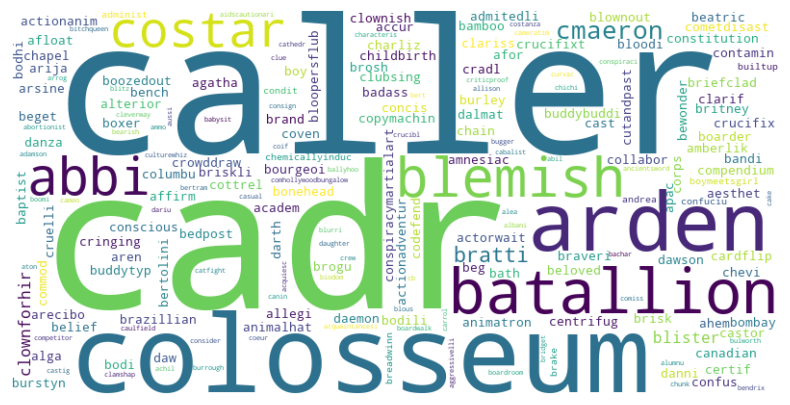

In [10]:
mots_plus_discriminants_positif, dict_odds_ratio_positif = get_mots_discriminants_odds_ratio(1, "polarite", df_preprocessed, mots_preprocessed, dic_size_positif, dic_size_negatif, N_mots_discriminants=100 )
mots_plus_discriminants_negatif, dict_odds_ratio_negatif = get_mots_discriminants_odds_ratio(0, "polarite", df_preprocessed, mots_preprocessed, dic_size_negatif, dic_size_positif, N_mots_discriminants=100 )
print("Mots plus discriminants reviews positives")
print(mots_plus_discriminants_positif) 
visualiser_wordcloud(dict_odds_ratio_positif)
print()
print("Mots plus discriminants reviews négatives")
print(mots_plus_discriminants_negatif)  
visualiser_wordcloud(dict_odds_ratio_negatif)

### Distribution d'apparition des mots ( loi de Zipf)

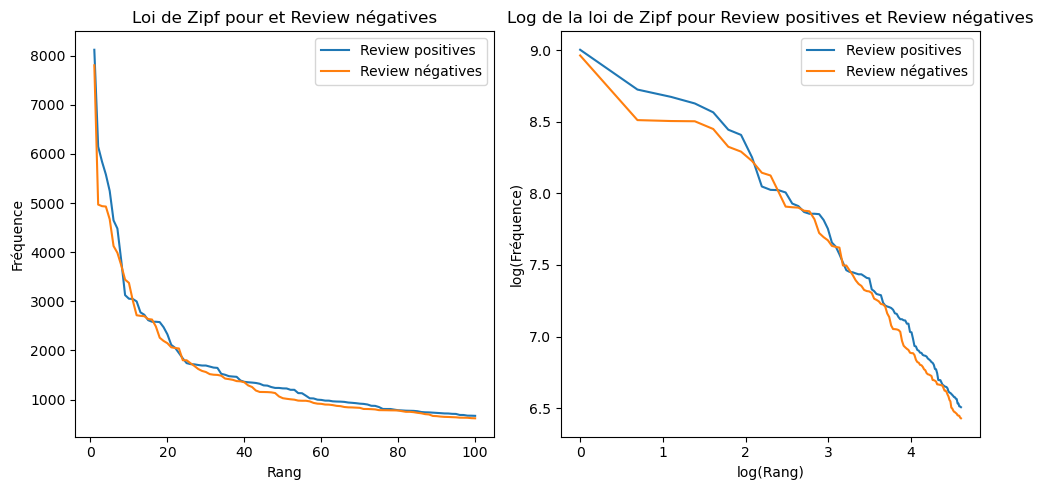

In [9]:
dictionnaire_mots_positif_trie =  dict(sorted(dictionnaire_mots_freq_positif.items(), key=lambda item: item[1], reverse=True))
dictionnaire_mots_negatif_trie =  dict(sorted(dictionnaire_mots_freq_negatif.items(), key=lambda item: item[1], reverse=True))

taille_vocab_min = min(len(dictionnaire_mots_negatif_trie),len(dictionnaire_mots_positif_trie))

rangs = list(range(1, taille_vocab_min+1))
y_positif = list(dictionnaire_mots_positif_trie.values())[:taille_vocab_min]
y_negatif = list(dictionnaire_mots_negatif_trie.values())[:taille_vocab_min]

tracer_loi_de_zipf(rangs, y_positif, y_negatif, label_positif='Review positives', label_negatif='Review négatives')


Quels sont les 100 bigrammes/trigrammes les plus fréquents?

In [11]:
dic_size_bi_grammes, bi_grammes, dict_bi_grammes = get_vocabulaire(df_preprocessed, top=100, n_gramme=(2,2))
bi_grammes[:20]

array(['about the', 'all the', 'and even', 'and hi', 'and that',
       'and the', 'and then', 'are the', 'but the', 'charact and',
       'could have', 'did nt', 'doe not', 'doe nt', 'dure the',
       'each other', 'end the', 'even the', 'fact that', 'film and'],
      dtype=object)

In [12]:
dic_size_tri_grammes, tri_grammes, dict_tri_grammes = get_vocabulaire(df_preprocessed, top=100, n_gramme=(3,3))
tri_grammes[:20]

array(['about thi film', 'all the way', 'along the way', 'and doe nt',
       'and that the', 'and the end', 'and the film', 'and there are',
       'between the two', 'but doe nt', 'but the film',
       'charact the film', 'could have been', 'deal with the',
       'did last summer', 'doe nt have', 'doe nt seem', 'end the film',
       'fall love with', 'film doe nt'], dtype=object)

In [13]:
dic_size_bi_tri_grammes, bi_tri_grammes, dict_bi_tri_grammes = get_vocabulaire(df_preprocessed, top=100, n_gramme=(2,3))
bi_tri_grammes[:20]

array(['about the', 'all the', 'and hi', 'and that', 'and the',
       'and then', 'are the', 'but the', 'charact and', 'could have',
       'did nt', 'doe not', 'doe nt', 'dure the', 'each other', 'end the',
       'even the', 'fact that', 'film and', 'film that'], dtype=object)

## Variante TF-IDF

### Vocabulaire

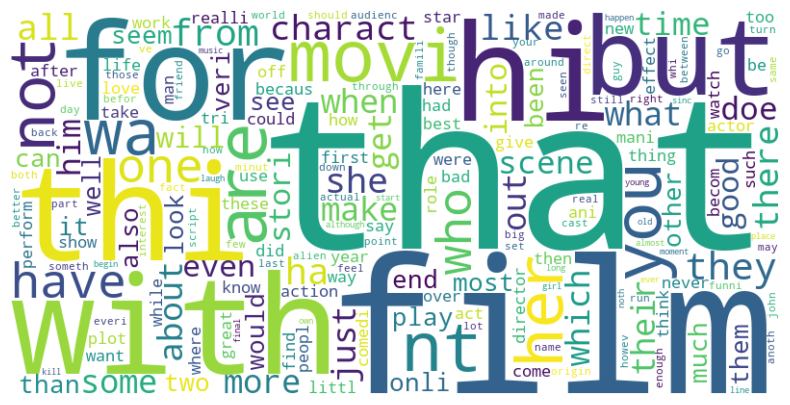

In [14]:
dict_size, mots, dict_scores = get_vocabulaire(df_preprocessed, type_vectorizer=TfidfVectorizer,  top=None, n_gramme=(1,1))
visualiser_wordcloud(dict_scores)

### Vocabulaire des revues positives

['aaaahhh' 'aah' 'aamir' 'aardman' 'aaron' 'abandon' 'abb' 'abba'
 'abberlin' 'abbi' 'abbot' 'abbott' 'abc' 'abduct' 'abducte' 'abduljabbar'
 'abe' 'abel' 'aberdeen' 'aberr']


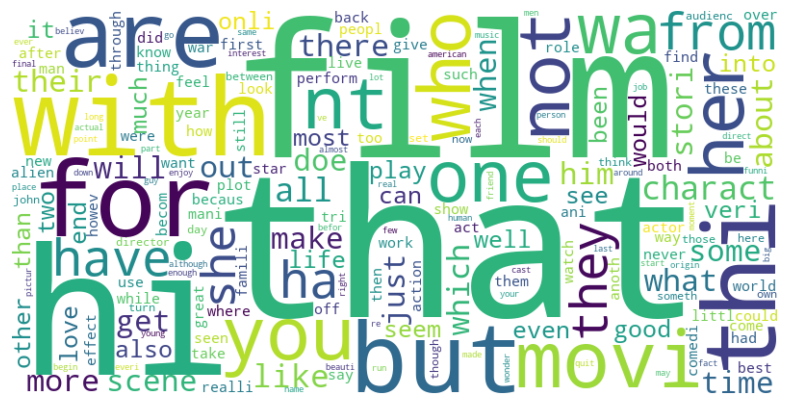

In [15]:
dic_size_positif, mots_positif, dictionnaire_mots_positif = get_vocabulaire(df_positif, type_vectorizer=TfidfVectorizer)
print(mots_positif[:20])
visualiser_wordcloud(dictionnaire_mots_positif)

### Vocabulaire des revues négatives

['aaa' 'aaaaaaaaah' 'aaaaaaaahhhh' 'aaaaaah' 'aaliyah' 'aalyah' 'aameet'
 'aaron' 'aatish' 'ab' 'aback' 'abandon' 'abat' 'abber' 'abbi' 'abbott'
 'abbrevi' 'abc' 'abdomen' 'abduct']


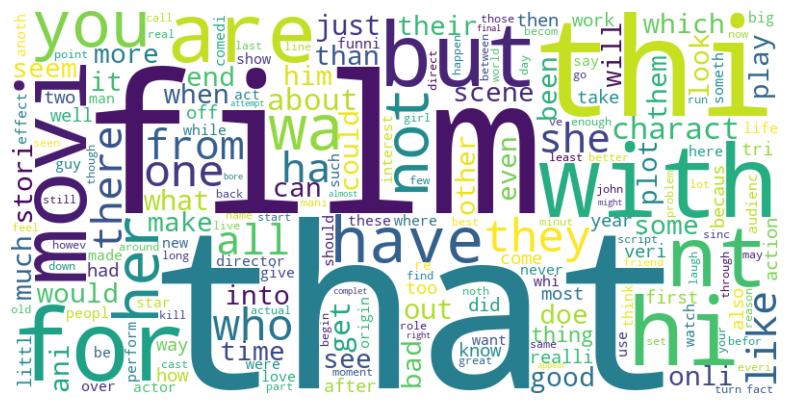

In [16]:
dic_size_negatif, mots_negatif, dictionnaire_mots_negatif = get_vocabulaire(df_negatif, type_vectorizer=TfidfVectorizer)
print(mots_negatif[:20])
visualiser_wordcloud(dictionnaire_mots_negatif)